In [1]:
import nltk 
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid=SentimentIntensityAnalyzer()

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
df=pd.read_csv("/content/drive/MyDrive/Data/Review.csv")
df.head()

,sentiment,review
0,Negative,I had no background knowledge of this movie be...
1,Negative,I am a huge Jane Austen fan and I ordered the ...
2,Negative,Nothing to say but Wow! Has anyone actually ha...
3,Negative,i like Jane Austin novels. I love Pride and Pr...
4,Negative,In this day and age of incredible special movi...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  10000 non-null  object
 1   review     10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [6]:
df.isna().sum()

sentiment    0
review       0
dtype: int64

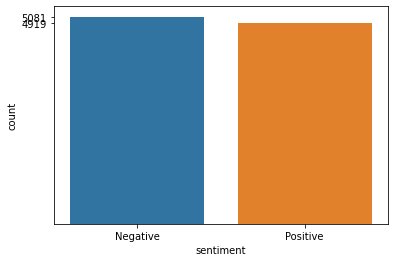

In [7]:
sns.countplot(data=df,x="sentiment")
c=df["sentiment"].value_counts()
plt.yticks(c)
plt.show()

In [8]:
blanks = []
for i, stem, rv in df.itertuples():
  if(type(rv)==str):
    if(rv.isspace()):
      blanks.append(i)

In [9]:
print(blanks)

[]


In [10]:
def text_clean(text):
  token=word_tokenize(text.lower())
  wtoken=[t for t in token if(t.isalpha())]
  stop=stopwords.words("english")
  ctoken=[t for t in wtoken if(t not in stop)]
  lemma=WordNetLemmatizer()
  ltoken=[lemma.lemmatize(t) for t in ctoken]
  return " ".join(ltoken)

In [11]:
df['review']=df['review'].apply(text_clean)

In [12]:
def get_scores(text):
  return sid.polarity_scores(text)

In [13]:
df['Score']=df['review'].apply(get_scores)

In [14]:
df.head()

,sentiment,review,Score
0,Negative,background knowledge movie bought sounded cool...,"{'neg': 0.282, 'neu': 0.538, 'pos': 0.181, 'co..."
1,Negative,huge jane austen fan ordered movie could see w...,"{'neg': 0.032, 'neu': 0.776, 'pos': 0.193, 'co..."
2,Negative,nothing say wow anyone actually somebody sneak...,"{'neg': 0.209, 'neu': 0.601, 'pos': 0.19, 'com..."
3,Negative,like jane austin novel love pride prejudice se...,"{'neg': 0.127, 'neu': 0.516, 'pos': 0.358, 'co..."
4,Negative,day age incredible special movie effect one so...,"{'neg': 0.152, 'neu': 0.586, 'pos': 0.262, 'co..."


In [15]:
df.drop('sentiment',inplace=True,axis=1)

In [16]:
def get_compound(dic):
  return dic["compound"]

In [17]:
df["compound"]=df['Score'].apply(get_compound)

In [18]:
df.head()

,review,Score,compound
0,background knowledge movie bought sounded cool...,"{'neg': 0.282, 'neu': 0.538, 'pos': 0.181, 'co...",-0.9509
1,huge jane austen fan ordered movie could see w...,"{'neg': 0.032, 'neu': 0.776, 'pos': 0.193, 'co...",0.9298
2,nothing say wow anyone actually somebody sneak...,"{'neg': 0.209, 'neu': 0.601, 'pos': 0.19, 'com...",-0.6130
3,like jane austin novel love pride prejudice se...,"{'neg': 0.127, 'neu': 0.516, 'pos': 0.358, 'co...",0.9661
4,day age incredible special movie effect one so...,"{'neg': 0.152, 'neu': 0.586, 'pos': 0.262, 'co...",0.8074


In [19]:
def predict(compound):
  if(compound>=0):
    return "positive"
  elif(compound<0):
    return "Negative"
  else:
    return "Neutral"

In [20]:
df['sentiment']=df['compound'].apply(predict)

In [21]:
df.head()

,review,Score,compound,sentiment
0,background knowledge movie bought sounded cool...,"{'neg': 0.282, 'neu': 0.538, 'pos': 0.181, 'co...",-0.9509,Negative
1,huge jane austen fan ordered movie could see w...,"{'neg': 0.032, 'neu': 0.776, 'pos': 0.193, 'co...",0.9298,positive
2,nothing say wow anyone actually somebody sneak...,"{'neg': 0.209, 'neu': 0.601, 'pos': 0.19, 'com...",-0.6130,Negative
3,like jane austin novel love pride prejudice se...,"{'neg': 0.127, 'neu': 0.516, 'pos': 0.358, 'co...",0.9661,positive
4,day age incredible special movie effect one so...,"{'neg': 0.152, 'neu': 0.586, 'pos': 0.262, 'co...",0.8074,positive


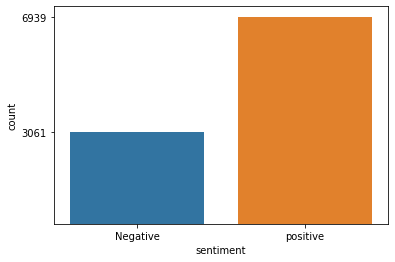

In [22]:
sns.countplot(data=df,x="sentiment")
c=df["sentiment"].value_counts()
plt.yticks(c)
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from wordcloud import WordCloud 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Dropout, Embedding

import warnings
warnings.filterwarnings("ignore")

In [24]:
df['sentiment'].replace({"Negative":0,"positive":1},inplace=True)

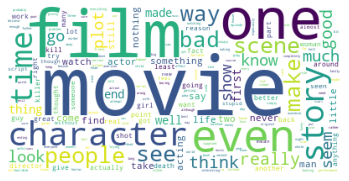

In [25]:
wc=WordCloud(background_color="white")

wc.generate(" ".join(df[df['sentiment']==0]["review"]))
plt.imshow(wc)
plt.axis("off")
plt.show()

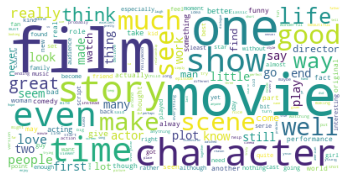

In [26]:
wc=WordCloud(background_color="white")

wc.generate(" ".join(df[df['sentiment']==1]["review"]))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [27]:
x=df['review']
y=df['sentiment']

In [28]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [29]:
 sentlen=[]

 for sent in df['review']:
   sentlen.append(len(word_tokenize(sent)))

In [30]:
df["sentlen"] = sentlen
df.head()

,review,Score,compound,sentiment,sentlen
0,background knowledge movie bought sounded cool...,"{'neg': 0.282, 'neu': 0.538, 'pos': 0.181, 'co...",-0.9509,0,117
1,huge jane austen fan ordered movie could see w...,"{'neg': 0.032, 'neu': 0.776, 'pos': 0.193, 'co...",0.9298,1,84
2,nothing say wow anyone actually somebody sneak...,"{'neg': 0.209, 'neu': 0.601, 'pos': 0.19, 'com...",-0.6130,0,114
3,like jane austin novel love pride prejudice se...,"{'neg': 0.127, 'neu': 0.516, 'pos': 0.358, 'co...",0.9661,1,63
4,day age incredible special movie effect one so...,"{'neg': 0.152, 'neu': 0.586, 'pos': 0.262, 'co...",0.8074,1,49


In [31]:
max(sentlen)

867

In [32]:
np.quantile(sentlen,0.95)
#95% of word in document has len 297

297.0

In [33]:
max_len=297

In [34]:
tok=Tokenizer(char_level=False,split=" ")
tok.fit_on_texts(xtrain)
tok.index_word

{1: 'movie',
 2: 'film',
 3: 'one',
 4: 'like',
 5: 'time',
 6: 'good',
 7: 'character',
 8: 'would',
 9: 'story',
 10: 'even',
 11: 'get',
 12: 'make',
 13: 'really',
 14: 'see',
 15: 'scene',
 16: 'much',
 17: 'well',
 18: 'could',
 19: 'bad',
 20: 'people',
 21: 'first',
 22: 'also',
 23: 'way',
 24: 'great',
 25: 'show',
 26: 'thing',
 27: 'made',
 28: 'life',
 29: 'think',
 30: 'go',
 31: 'know',
 32: 'watch',
 33: 'love',
 34: 'end',
 35: 'seen',
 36: 'plot',
 37: 'actor',
 38: 'acting',
 39: 'many',
 40: 'little',
 41: 'two',
 42: 'never',
 43: 'say',
 44: 'look',
 45: 'best',
 46: 'year',
 47: 'ever',
 48: 'still',
 49: 'man',
 50: 'take',
 51: 'come',
 52: 'better',
 53: 'part',
 54: 'want',
 55: 'work',
 56: 'find',
 57: 'something',
 58: 'give',
 59: 'director',
 60: 'performance',
 61: 'watching',
 62: 'back',
 63: 'lot',
 64: 'woman',
 65: 'real',
 66: 'nothing',
 67: 'guy',
 68: 'actually',
 69: 'though',
 70: 'role',
 71: 'another',
 72: 'play',
 73: 'new',
 74: 'funny',

In [35]:
vocab_len=len(tok.index_docs)

In [36]:
vocab_len

37307

In [37]:
seqtrain=tok.texts_to_sequences(xtrain)
seqtrain

[[164,
  768,
  191,
  646,
  1,
  102,
  1189,
  331,
  484,
  42,
  87,
  52,
  38,
  123,
  5128,
  37,
  375,
  448,
  191,
  208,
  1,
  23,
  516,
  123,
  8,
  6798,
  1190,
  103,
  42,
  87,
  53,
  11485,
  146,
  1500,
  25,
  5349,
  2845,
  6422,
  7638,
  280,
  251,
  587,
  1,
  110,
  8,
  522,
  140,
  602,
  21,
  1046,
  630,
  8,
  52,
  61,
  2339,
  2103],
 [7639,
  23106,
  21,
  1,
  319,
  36,
  38,
  282,
  2449,
  1611,
  433,
  7,
  391,
  116,
  14,
  61,
  1,
  14,
  7639,
  7167,
  38,
  427,
  962,
  77,
  502,
  24,
  173,
  22,
  1,
  1903,
  430,
  17,
  240,
  141,
  113,
  205,
  49,
  1850,
  1480,
  112,
  184,
  752,
  29,
  1,
  217,
  35,
  1731,
  5,
  361,
  78,
  3,
  579],
 [3893,
  4937,
  1851,
  1225,
  459,
  8174,
  1904,
  2173,
  11486,
  6799,
  2846,
  859,
  5840,
  8175,
  3410,
  9493,
  28,
  600,
  1137,
  4282,
  3084,
  73,
  5129,
  613,
  1523,
  8176,
  17805,
  408,
  629,
  8176,
  1181,
  5130,
  1159,
  939,
  6103,


In [38]:
Seqmatrix=sequence.pad_sequences(seqtrain,max_len)

In [39]:
Seqmatrix

array([[    0,     0,     0, ...,    61,  2339,  2103],
       [    0,     0,     0, ...,    78,     3,   579],
       [  186,   343,  4937, ...,    93,   204,  3011],
       ...,
       [    0,     0,     0, ...,   269,  1472, 12727],
       [    0,     0,     0, ..., 14497,  4681,  3168],
       [    0,     0,     0, ...,   654,     1,  1024]], dtype=int32)

In [40]:
rnn=Sequential()

rnn.add(Embedding(vocab_len+1,700,input_length=max_len,mask_zero=True))
rnn.add(SimpleRNN(units=32,activation="tanh"))

rnn.add(Dense(units=32,activation="relu"))
rnn.add(Dropout(0.2))
rnn.add(Dense(units=1,activation="sigmoid"))

rnn.compile(optimizer="adam",loss="binary_crossentropy")
rnn.fit(Seqmatrix,ytrain,batch_size=50,epochs=50)

seqtest=sequence.pad_sequences(tok.texts_to_sequences(xtest),maxlen=max_len)

ypred=rnn.predict(seqtest)
ypred=ypred>0.5

Epoch 1/50
140/140 [==============================] - 68s 474ms/step - loss: 0.6137
Epoch 2/50
140/140 [==============================] - 67s 480ms/step - loss: 0.3968
Epoch 3/50
140/140 [==============================] - 67s 477ms/step - loss: 0.0964
Epoch 4/50
140/140 [==============================] - 67s 477ms/step - loss: 0.0094
Epoch 5/50
140/140 [==============================] - 67s 477ms/step - loss: 0.0017
Epoch 6/50
140/140 [==============================] - 67s 481ms/step - loss: 8.1482e-04
Epoch 7/50
140/140 [==============================] - 68s 484ms/step - loss: 5.4644e-04
Epoch 8/50
140/140 [==============================] - 68s 488ms/step - loss: 3.6476e-04
Epoch 9/50
140/140 [==============================] - 68s 485ms/step - loss: 2.8653e-04
Epoch 10/50
140/140 [==============================] - 67s 482ms/step - loss: 2.3021e-04
Epoch 11/50
140/140 [==============================] - 67s 479ms/step - loss: 1.6953e-04
Epoch 12/50
140/140 [=============================

In [41]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.42      0.44      0.43       906
           1       0.75      0.74      0.75      2094

    accuracy                           0.65      3000
   macro avg       0.59      0.59      0.59      3000
weighted avg       0.65      0.65      0.65      3000



In [42]:
rnn=Sequential()

rnn.add(Embedding(vocab_len+1,700,input_length=max_len,mask_zero=True))

rnn.add(LSTM(units=32, activation="tanh"))
rnn.add(Dense(units=32,activation="relu"))
rnn.add(Dropout(0.2))
rnn.add(Dense(units=1,activation="sigmoid"))

rnn.compile(optimizer="adam",loss="binary_crossentropy")
rnn.fit(Seqmatrix,ytrain,batch_size=50,epochs=20)

seqtest=sequence.pad_sequences(tok.texts_to_sequences(xtest),maxlen=max_len)

ypred=rnn.predict(seqtest)
ypred=ypred>0.5

Epoch 1/20
140/140 [==============================] - 111s 765ms/step - loss: 0.5282
Epoch 2/20
140/140 [==============================] - 108s 771ms/step - loss: 0.2088
Epoch 3/20
140/140 [==============================] - 107s 767ms/step - loss: 0.0516
Epoch 4/20
140/140 [==============================] - 109s 779ms/step - loss: 0.0193
Epoch 5/20
140/140 [==============================] - 107s 767ms/step - loss: 0.0606
Epoch 6/20
140/140 [==============================] - 108s 773ms/step - loss: 0.0162
Epoch 7/20
140/140 [==============================] - 108s 771ms/step - loss: 0.0056
Epoch 8/20
140/140 [==============================] - 110s 788ms/step - loss: 0.0032
Epoch 9/20
140/140 [==============================] - 112s 796ms/step - loss: 0.0076
Epoch 10/20
140/140 [==============================] - 108s 772ms/step - loss: 0.0075
Epoch 11/20
140/140 [==============================] - 111s 795ms/step - loss: 0.0266
Epoch 12/20
140/140 [==============================] - 109s 777

In [43]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.69      0.64      0.66       906
           1       0.85      0.88      0.86      2094

    accuracy                           0.81      3000
   macro avg       0.77      0.76      0.76      3000
weighted avg       0.80      0.81      0.80      3000

